In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_data_dir = './Vegetable Images/train'

image_height = 256
image_width = 256


train_data_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     zoom_range=0.2,
                                     horizontal_flip=True)  
train_data = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=10,
    class_mode='sparse',
    shuffle=True
)

Found 3938 images belonging to 4 classes.


In [9]:
val_data_dir = './Vegetable Images/validation'

val_data_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     zoom_range=0.2,
                                     horizontal_flip=True)
val_data = train_data_generator.flow_from_directory(
    val_data_dir,
    target_size=(image_height, image_width),
    batch_size=2,
    class_mode='sparse',
    shuffle=True
)

Found 996 images belonging to 4 classes.


In [10]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [11]:
model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

Epoch 1/20
394/394 [==============================] - 681s 2s/step - loss: 0.4459 - accuracy: 0.8192 - val_loss: 0.8378 - val_accuracy: 0.7731
Epoch 2/20
394/394 [==============================] - 648s 2s/step - loss: 0.2169 - accuracy: 0.9104 - val_loss: 0.6678 - val_accuracy: 0.8263
Epoch 3/20
394/394 [==============================] - 712s 2s/step - loss: 0.1543 - accuracy: 0.9411 - val_loss: 0.7950 - val_accuracy: 0.8133
Epoch 4/20
394/394 [==============================] - 813s 2s/step - loss: 0.1383 - accuracy: 0.9469 - val_loss: 0.4831 - val_accuracy: 0.8504
Epoch 5/20
394/394 [==============================] - 815s 2s/step - loss: 0.1156 - accuracy: 0.9566 - val_loss: 0.8311 - val_accuracy: 0.8283
Epoch 6/20
394/394 [==============================] - 813s 2s/step - loss: 0.1140 - accuracy: 0.9619 - val_loss: 0.4710 - val_accuracy: 0.8675
Epoch 7/20
394/394 [==============================] - 823s 2s/step - loss: 0.0915 - accuracy: 0.9708 - val_loss: 0.7216 - val_accuracy: 0.8143

In [12]:
test_data_dir = './Vegetable Images/test'

test_data_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=45,
                                     horizontal_flip=True)
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=2,
    class_mode='sparse',
    shuffle=False
)

loss, accuracy = model.evaluate(test_data)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 787 images belonging to 4 classes.
394/394 [==============================] - 70s 174ms/step - loss: 0.0823 - accuracy: 0.9835
Test loss: 0.0823
Test accuracy: 0.9835


C:\Users\EunHa\AppData\Local\Temp\ipykernel_13784\3717467515.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data)


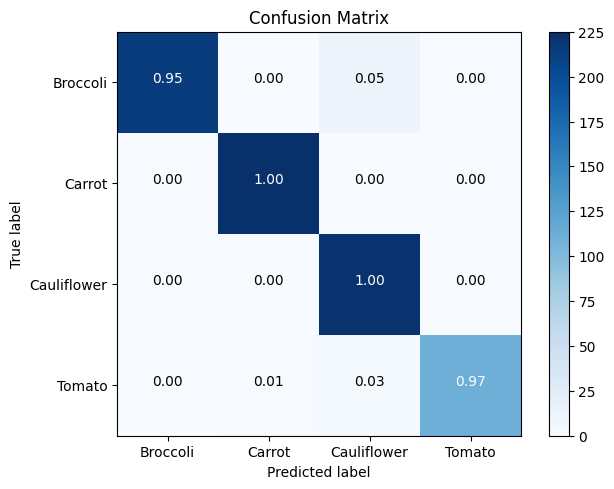

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

num_classes = len(test_data.class_indices)

y_pred = model.predict_generator(test_data)

y_pred = np.argmax(y_pred, axis=1)

y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)

class_labels = test_data.class_indices.keys()

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

thresh = cm_normalized.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [14]:
import cv2 as cv 
import tensorflow as tf

In [15]:
labels = ["Broccoli", "Carrot", "Cauliflower", "Tomato"]

1/1 [==============================] - 0s 349ms/step
This image most likely belongs to Tomato


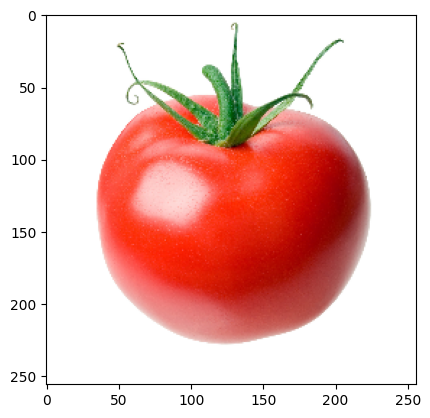

In [34]:
test_path = './vegfresh/train/Fresh/Image_3.jpg'

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256,256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(labels[np.argmax(predictions)])
)

plt.imshow(resized)
plt.show()

In [29]:
saved_model_path = "./my_modelclass3.h5"

model.save(saved_model_path)

In [30]:
! tensorflowjs_converter \
    --input_format=keras \
    {saved_model_path} \
    "./"

2023-06-12 14:49:57.269480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-12 14:49:57.270282: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
